## Data science homework 3
資工二 110590034 楊榮鈞

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#在Jupyter Notebook上顯示圖表所必需的　magic command
%matplotlib inline
import requests
import time
import datetime
data = pd.DataFrame()

#設置初始日期
first_date = datetime.date(2022,1,1)
for i in range(0,365,1):
    
    # 可以使用下一行程式來看程式是否有在執行
    print(first_date,end='\t')
    
    #加datetime格式轉成string
    date = str(first_date).replace('-','')
    
    #爬取程式 詳情請參考LAB2
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    response = requests.get(url)
    response_json = response.json()
    if response_json['stat']=='OK':
        stock = pd.DataFrame(response_json['data9'], 
                     columns=response_json['fields9'])
        stock['date'] = first_date
        data = pd.concat([data,stock])
        
    # 利用 datetime格式使日期加1天  datetime格式會自動進位月分與年份 
    first_date = first_date + datetime.timedelta(days=1)
    
    # *****非常重要*****
    # *****非常重要*****
    # *****非常重要*****
    # 將程式延遲5秒在執行下一次迴圈
    time.sleep(5)

2022-01-01	2022-01-02	2022-01-03	2022-01-04	2022-01-05	2022-01-06	2022-01-07	2022-01-08	2022-01-09	2022-01-10	2022-01-11	2022-01-12	2022-01-13	2022-01-14	2022-01-15	2022-01-16	2022-01-17	2022-01-18	2022-01-19	2022-01-20	2022-01-21	2022-01-22	2022-01-23	2022-01-24	2022-01-25	2022-01-26	2022-01-27	2022-01-28	2022-01-29	2022-01-30	2022-01-31	2022-02-01	2022-02-02	2022-02-03	2022-02-04	2022-02-05	2022-02-06	2022-02-07	2022-02-08	2022-02-09	2022-02-10	2022-02-11	2022-02-12	2022-02-13	2022-02-14	2022-02-15	2022-02-16	2022-02-17	2022-02-18	2022-02-19	2022-02-20	2022-02-21	2022-02-22	2022-02-23	2022-02-24	2022-02-25	2022-02-26	2022-02-27	2022-02-28	2022-03-01	2022-03-02	2022-03-03	2022-03-04	2022-03-05	2022-03-06	2022-03-07	2022-03-08	2022-03-09	2022-03-10	2022-03-11	2022-03-12	2022-03-13	2022-03-14	2022-03-15	2022-03-16	2022-03-17	2022-03-18	2022-03-19	2022-03-20	2022-03-21	2022-03-22	2022-03-23	2022-03-24	2022-03-25	2022-03-26	2022-03-27	2022-03-28	2022-03-29	2022-03-30	2022-03-31	2022-04-01

In [2]:
#請爬取完後進行輸出保存，以免未來需要從重新使用原始資料
data.to_csv('data_science_hw3.csv')

In [3]:
pwd

'D:\\jupyter\\data_science\\hw3'

In [4]:
#請用絕對位置，相對路徑會導向安裝anaconda的地方
data = pd.read_csv('D:\\jupyter\\data_science\\hw3\\data_science_hw3.csv',index_col=0)
#只取出想要的columns
data = data[['date','證券名稱','開盤價','收盤價']]
#把收盤價改為英文標題，未來處理其他程序時才不會有警告圖示
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'開盤價':'opening_price'})
data = data.rename(columns = {'收盤價':'closing_price'})
data['opening_price'] = data['opening_price'].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data['opening_price'] = data['opening_price'].astype('float64')
data['closing_price'] = data['closing_price'].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data['closing_price'] = data['closing_price'].astype('float64')
data_TSMC = data[data['name']=='台積電']
data_TSMC = data_TSMC.drop('name',axis = 1)
display(data_TSMC)

,date,opening_price,closing_price
438,2022-01-03,619.0,631.0
438,2022-01-04,645.0,656.0
438,2022-01-05,669.0,650.0
438,2022-01-06,638.0,644.0
438,2022-01-07,643.0,634.0
...,...,...,...
453,2022-12-26,454.0,456.5
453,2022-12-27,458.0,457.0
453,2022-12-28,451.0,451.0
453,2022-12-29,444.0,446.0


In [5]:
data_TSMC = data_TSMC.dropna() #drop row if row has NaN
display(data_TSMC)

,date,opening_price,closing_price
438,2022-01-03,619.0,631.0
438,2022-01-04,645.0,656.0
438,2022-01-05,669.0,650.0
438,2022-01-06,638.0,644.0
438,2022-01-07,643.0,634.0
...,...,...,...
453,2022-12-26,454.0,456.5
453,2022-12-27,458.0,457.0
453,2022-12-28,451.0,451.0
453,2022-12-29,444.0,446.0


<AxesSubplot:xlabel='date'>

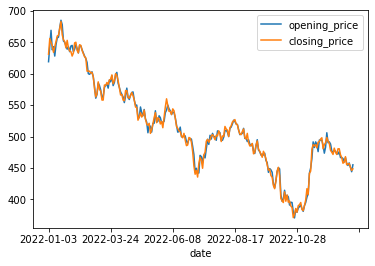

In [6]:
#df內的資料型態必須一樣，所以使日期當作是index也就是橫坐標
data_TSMC = data_TSMC.set_index('date')
#如果按一次沒顯示，那就再按一次。
data_TSMC.plot()